In [1]:
import mne
import os.path as op
import numpy as np
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline

# `Raw`: continuous data

Continuous data is stored in objects of type `Raw`. The core data structure is simply a 2D numpy array (channels × samples, `._data`) combined with an `Info` object (`.info`)(**LINK TO INFO TUTORIAL**).

The most common way to load continuous data is from a .fif file. For more information on loading data from other formats, see (**LINK TO IO TUTORIAL**), or creating it from raw data, see (**LINK TO CREATION TUTORIAL**).

## Loading data

In [2]:
# Load an example dataset, the preload flag loads the data into memory now
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.RawFIF(data_path, preload=True, verbose=False)

# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('channels x samples:', raw._data.shape)

sample rate: 600.614990234 Hz
channels x samples: (376, 166800)


Information about the channels contained in the `Raw` object is contained in the `info` attribute. This is essentially a dictionary with a number of relevant fields (**SEE INFO TUTORIAL FOR FULL DESCRIPTION**)

## Indexing data
There are two ways to access the data stored within `Raw` objects. One is by accessing the underlying data array, and the other is to index the `Raw` object directly.

To access the data array of `Raw` objects, use the `_data` attribute. Note that this is only present if `preload==True`.

Shape of data array: (376, 166800)


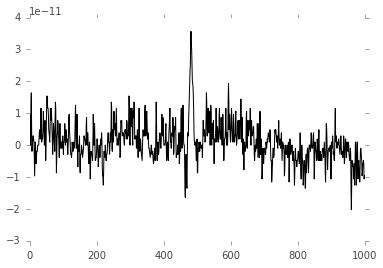

In [3]:
print('Shape of data array:', raw._data.shape)
array_data = raw._data[0, :1000]
_ = plt.plot(array_data)

You can also pass an index directly to the `Raw` object. This will return an array of times, as well as the data representing those timepoints. This may be used even if the data is not preloaded:

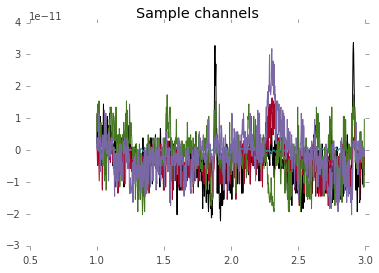

In [4]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

## Selecting subsets of channels and samples
It is possible to use more intelligent indexing to extract data, using channel names, types or time ranges.

In [5]:
# Pull all MEG gradiometer channels:
# Make sure to use copy==True or it will overwrite the data
meg_only = raw.pick_types(meg=True, copy=True)
eeg_only = raw.pick_types(meg=False, eeg=True, copy=True)

# The MEG flag in particular lets you specify a string for more specificity
grad_only = raw.pick_types(meg='grad', copy=True)

# Or you can use custom channel names
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123',]
specific_chans = raw.pick_channels(pick_chans, copy=True)
print(meg_only, eeg_only, grad_only, specific_chans, sep='\n')

<RawFIF  |  n_channels x n_times : 305 x 166800>
<RawFIF  |  n_channels x n_times : 59 x 166800>
<RawFIF  |  n_channels x n_times : 203 x 166800>
<RawFIF  |  n_channels x n_times : 4 x 166800>


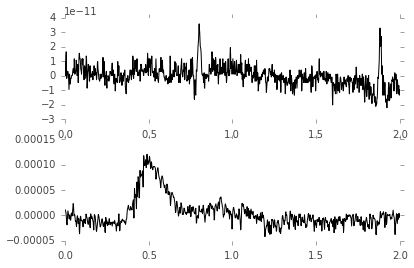

In [6]:
# Notice the different scalings of these types
f, (a1, a2) = plt.subplots(2, 1)
eeg, times = eeg_only[0, :int(sfreq * 2)]
meg, times = meg_only[0, :int(sfreq * 2)]
a1.plot(times, meg[0])
a2.plot(times, eeg[0])

In [17]:
# You can restrict the data to a specific time range
restricted = raw.crop(5, 7) # in seconds
print('New time range from', restricted.times.min(), 's to', restricted.times.max(), 's')

# And drop channels by name
restricted = restricted.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', raw.info['nchan'], 'to', restricted.info['nchan'])

New time range from 0.0 s to 1.99795213158 s
Number of channels reduced from 376 to 374


## Concatenating `Raw` objects

`Raw` objects can be concatenated in time by using the `append` function. For this to work, they must have the same number of channels and their `info` structures should be compatible.

In [9]:
# Create multiple `Raw` objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 100)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Time extends from 0.0 s to 100.000834106 s
